In [8]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

In [9]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("final_df.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring in df['ervaring'].unique():
    for geslacht in df['binary_geslacht'].unique():
        for gewichtsklasse in df['binary_gewichtsklasse'].unique():
            subset = df[(df['ervaring'] == ervaring) & (df['binary_geslacht'] == geslacht) & (df['binary_gewichtsklasse'] == gewichtsklasse)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.3, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']
X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']
X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

Trainingsdata: 3018 rijen
Validatiedata: 905 rijen
Testdata: 391 rijen


most fitting lambda: 0.01
MSE: 116.1539240537786
RMSE: 10.777472990166972
MAE: 8.468323136834067
R-squared: 0.8868905877086988
         y_pred  y_test  pred - test
0    425.583305   427.7    -2.116695
1    426.593780   420.5     6.093780
2    420.124316   418.6     1.524316
3    426.060378   427.7    -1.639622
4    430.037698   427.7     2.337698
..          ...     ...          ...
386  382.695123   381.6     1.095123
387  385.636140   379.9     5.736140
388  383.121845   389.4    -6.278155
389  393.636439   382.2    11.436439
390  383.661758   381.6     2.061758

[391 rows x 3 columns]


/home/imme/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/imme/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


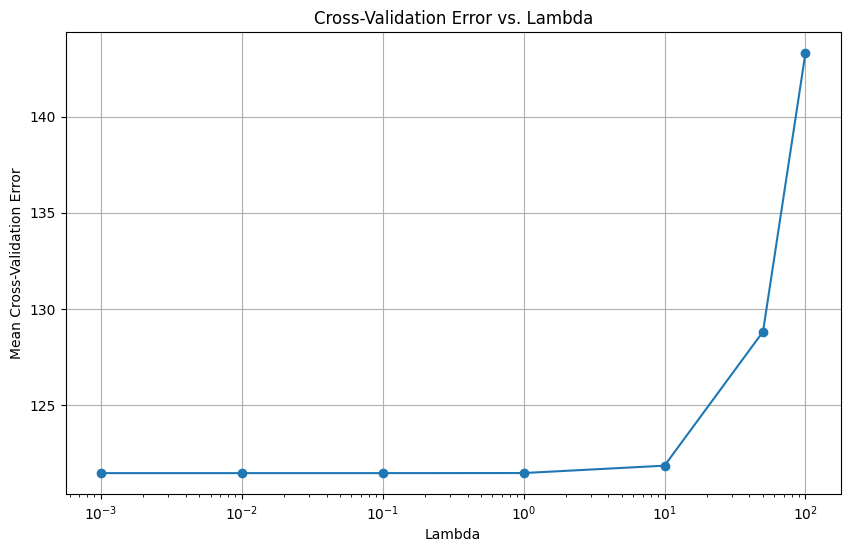

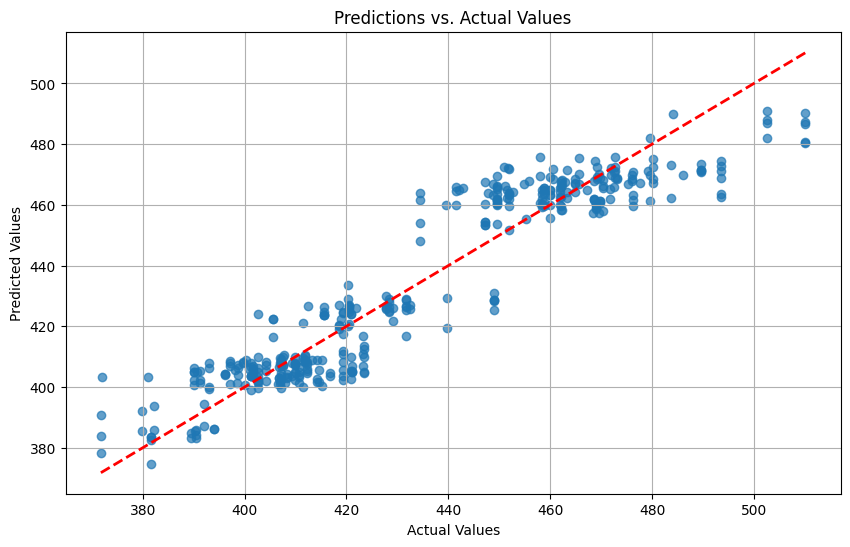

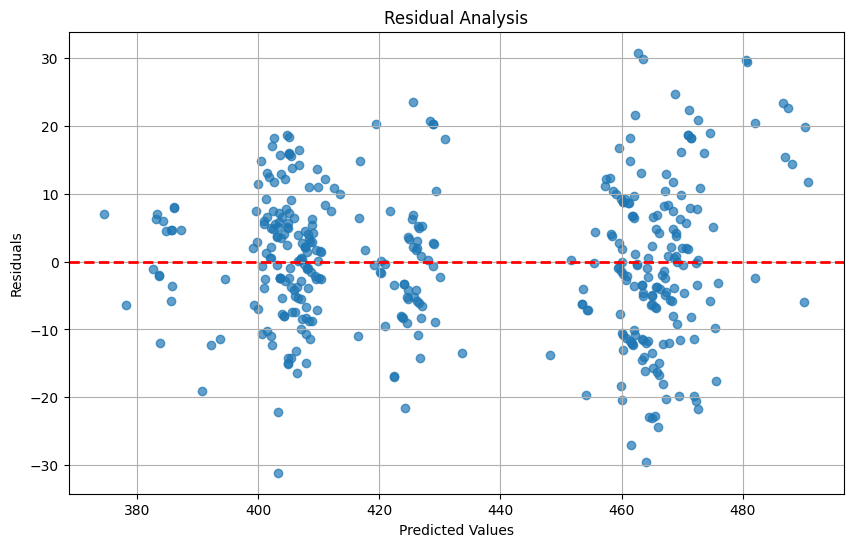

In [10]:
X_train, X_val = X_train.align(X_val, join='outer', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

poss_lam = [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0]

ridge_cv_model = RidgeCV(alphas=poss_lam, store_cv_values=True)

ridge_cv_model.fit(X_train, y_train)

print(f"most fitting lambda: {ridge_cv_model.alpha_}")

ridge_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

print(pd.DataFrame({'y_pred': y_pred, 'y_test': y_test, 'pred - test': y_pred - y_test}))

cv_errors = np.mean(ridge_cv_model.cv_values_, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(poss_lam, cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Cross-Validation Error vs. Lambda')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()